In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter,LatitudeFormatter
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import cmap
import cartopy.feature as cFeature

## Load climate variables for specified area and model run

In [22]:
# Define dataset specifics

model_scenario_name = 'NorESM2-LM_ssp126' # Choose a model and SSP scenario
area_name = 'global' # Choose an area

# Defines start and end of time slice by picking 20 years before and 20 years after abrupt SPG cooling
if model_scenario_name == 'NorESM2-LM_ssp126':
    start_time = '2015-01-01'; end_time = '2055-01-01'
    middle_time = '2035-01-01'
    time_array = np.arange(2015, 2055, 1)
elif model_scenario_name == 'CESM2-WACCM_ssp126':
    start_time = '2020-01-01'; end_time = '2060-01-01'
    middle_time = '2040-01-01'
    time_array = np.arange(2020, 2060, 1)
elif model_scenario_name == 'MRI-ESM2_ssp245':
    start_time = '2020-01-01'; end_time = '2060-01-01'
    middle_time = '2040-01-01'
    time_array = np.arange(2020, 2060, 1)
else:
    print("This dataset is not considered in the current study, but can be added to the analysis")

if area_name == 'norway':
    southern_lat = 57; northern_lat = 72
    western_lon = 2.5; eastern_lon = 33
elif area_name == 'germany':
    southern_lat = 46.5; northern_lat = 55.5
    western_lon = 5; eastern_lon = 15
elif area_name == 'global':
    southern_lat = -90; northern_lat = 90
    western_lon = 0; eastern_lon = 360
else:
    print("This area is not predefined in the current study, but can be added to the analysis")

data_folder = '../CMIP6_data/' # Folder where downloaded CMIP6 data is stored
save_folder = '../climatic_indices/' # Folder where climate indices should be saved
os.makedirs(save_folder, exist_ok=True) 


# Load maximum daily temperature data
"""
files = glob.glob(data_folder+'tasmax_day_'+model_scenario_name+'*')
files.sort()
tasmax = xr.open_mfdataset(files)

tmax = tasmax.tasmax.sel(lat=slice(southern_lat, northern_lat), 
                        lon=slice(western_lon, eastern_lon), 
                        time=slice(start_time, end_time))
tmax.load()

# Load minimum daily temperature data

files = glob.glob(data_folder+'tasmin_day_'+model_scenario_name+'*')
files.sort()
tasmin = xr.open_mfdataset(files)

tmin = tasmin.tasmin.sel(lat=slice(southern_lat, northern_lat), 
                        lon=slice(western_lon, eastern_lon), 
                        time=slice(start_time, end_time))

tmin.load()
"""

files = glob.glob(data_folder+'tas_day_'+model_scenario_name+'*')
files.sort()
tas = xr.open_mfdataset(files)

temp = tas.tas.sel(lat=slice(southern_lat, northern_lat), 
                        lon=slice(western_lon, eastern_lon), 
                        time=slice(start_time, end_time))

temp.load()

<xarray.DataArray 'tas' (time: 14601, lat: 96, lon: 144)> Size: 807MB
array([[[245.39299, 245.26625, 245.24359, ..., 245.43411, 245.43156,
         245.41884],
        [245.90485, 245.65843, 245.57362, ..., 246.17181, 246.10094,
         246.0272 ],
        [246.03168, 245.82318, 245.76562, ..., 246.68001, 246.58302,
         246.39232],
        ...,
        [249.08612, 248.83887, 248.50468, ..., 249.46417, 249.34734,
         249.23926],
        [247.35063, 247.2369 , 247.15875, ..., 247.9689 , 247.76308,
         247.52243],
        [247.84253, 247.79787, 247.72707, ..., 247.84671, 247.84557,
         247.8442 ]],

       [[244.57422, 244.4488 , 244.42184, ..., 244.61806, 244.61514,
         244.60341],
        [245.22   , 244.9689 , 244.88753, ..., 245.48564, 245.4172 ,
         245.34264],
        [245.3813 , 245.15068, 245.07832, ..., 246.08618, 245.96875,
         245.75612],
...
        [263.69275, 263.9441 , 264.2124 , ..., 262.12103, 262.80576,
         263.24597],
        [262.38196, 262.31992, 262.20102, ..., 262.4462 , 262.44672,
         262.43893],
        [259.78162, 259.75165, 259.71002, ..., 259.8135 , 259.80484,
         259.79425]],

       [[252.4027 , 252.27188, 252.24855, ..., 252.44447, 252.44469,
         252.43015],
        [252.13199, 251.88268, 251.79724, ..., 252.45773, 252.3673 ,
         252.2881 ],
        [250.39125, 250.17975, 250.15178, ..., 251.20628, 251.05345,
         250.78401],
        ...,
        [262.89285, 263.05313, 262.95615, ..., 259.3924 , 261.3696 ,
         262.32275],
        [261.69727, 261.46747, 261.13113, ..., 261.7701 , 261.8529 ,
         261.8501 ],
        [259.81113, 259.7347 , 259.6179 , ..., 259.83987, 259.83206,
         259.82254]]], dtype=float32)
Coordinates:
  * time     (time) object 117kB 2015-01-01 12:00:00 ... 2055-01-01 12:00:00
  * lat      (lat) float64 768B -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon      (lon) float64 1kB 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    height   float64 8B 2.0
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    original_name:  TREFHT
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-12-06T14:54:06Z altered by CMOR: Treated scalar dime...

In [ ]:
    middle_time = '2035-01-01'

## Plot timeseries for specific grid point

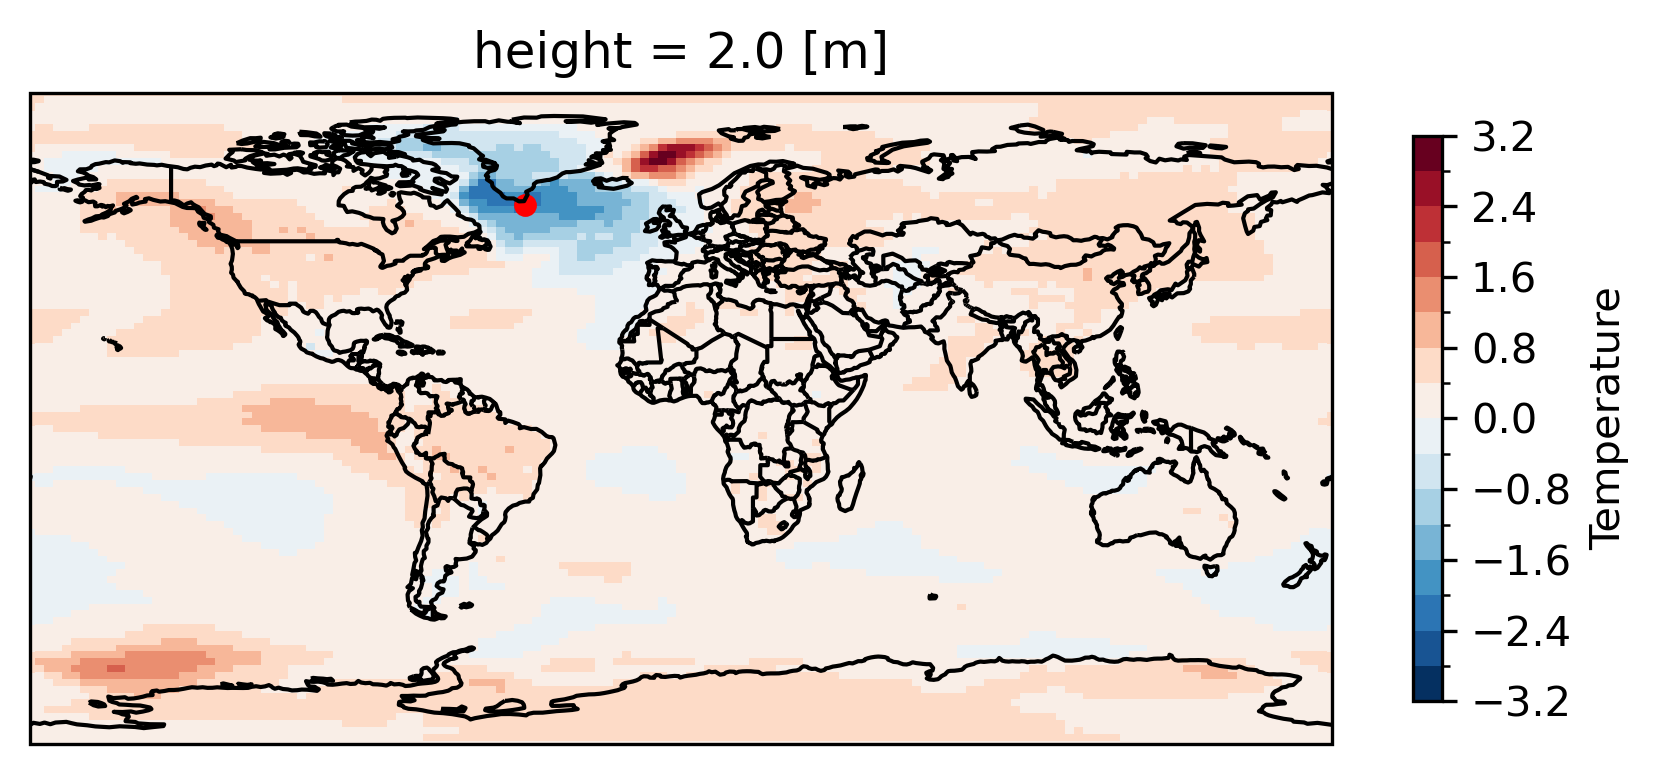

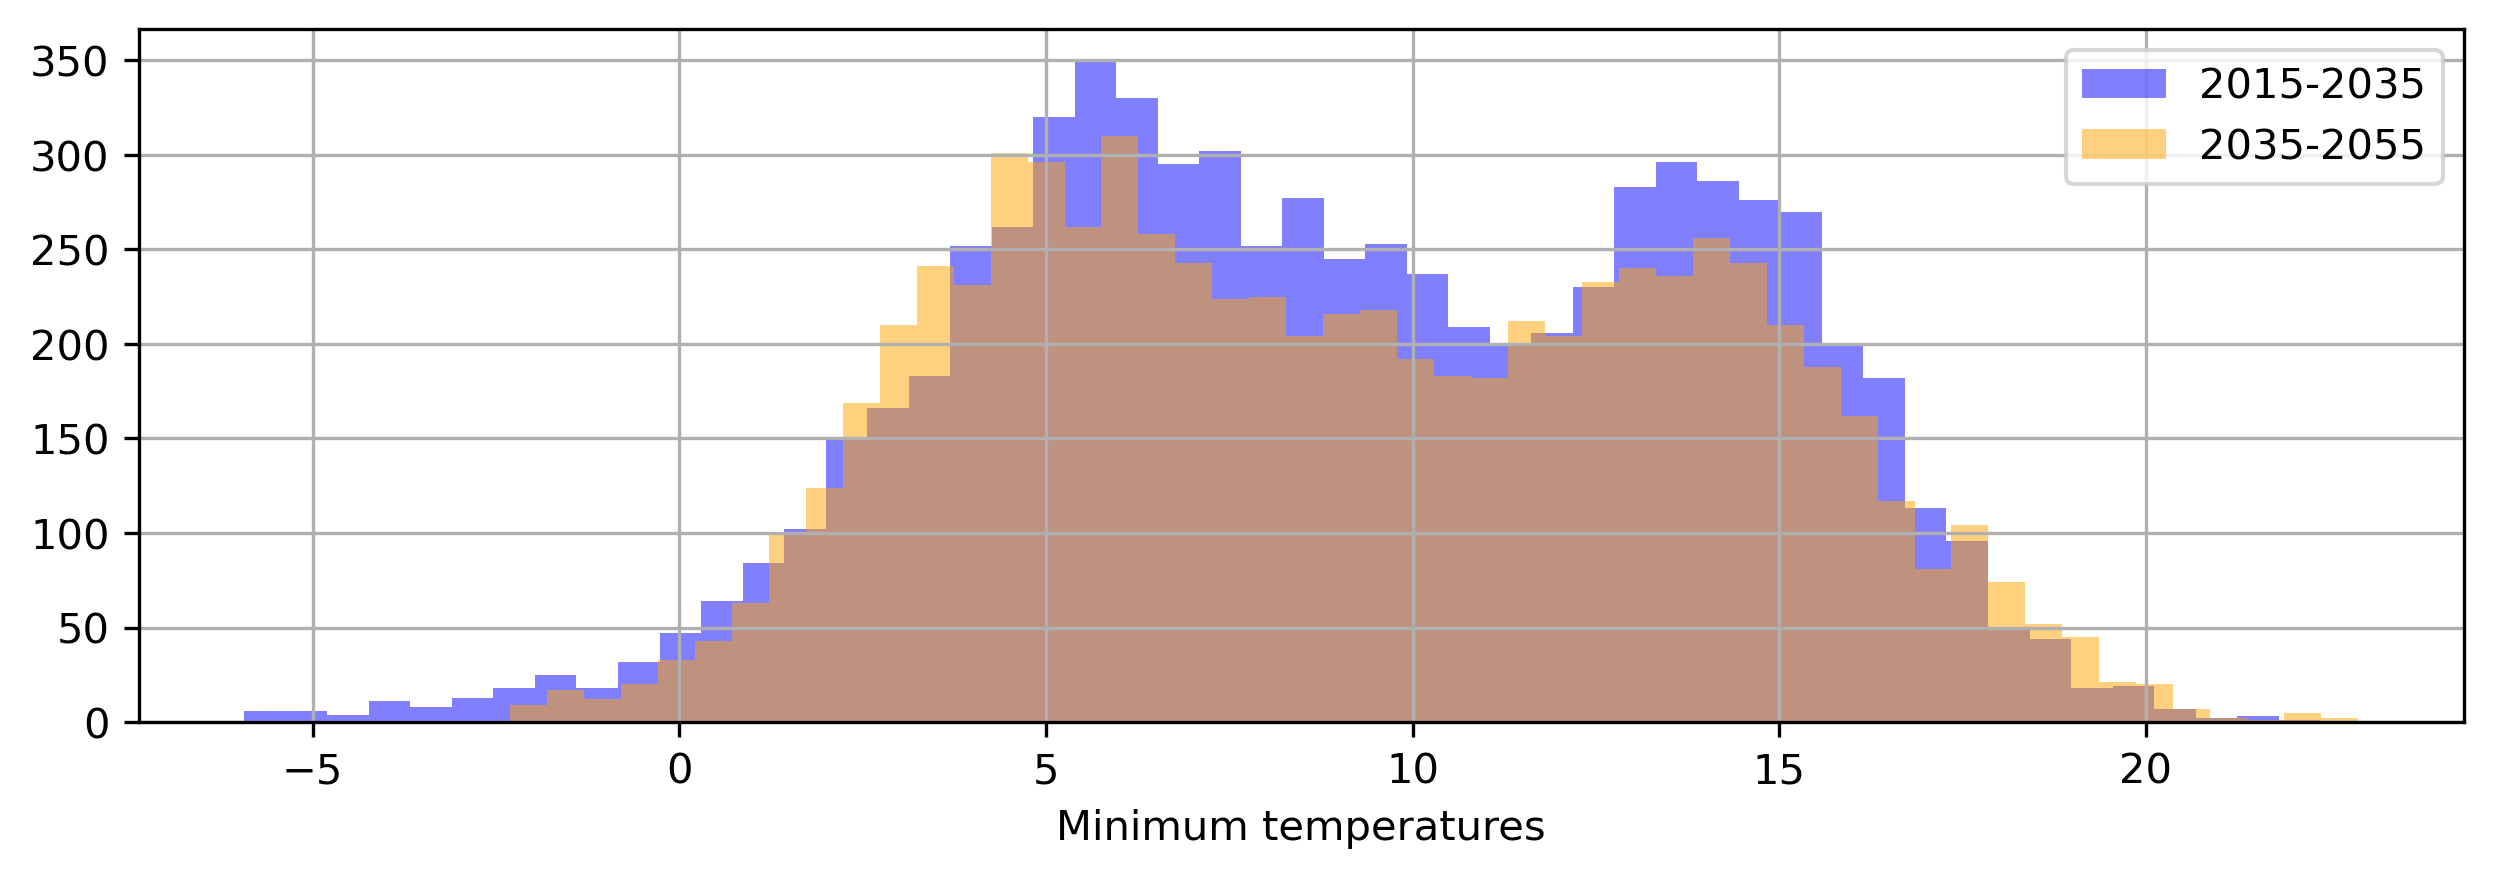

"\nfor variable in variable_list:\n    fig = plt.figure(figsize=[10, 3],dpi=300)\n    values = clim_idx[variable].sel(lat=lat, lon=lon, method='nearest')\n    plt.scatter(clim_idx.time, values)\n    plt.plot(clim_idx.time[:21], values[:21], color='blue',linestyle='--', label='Mean='+str(np.round(float(np.mean(values[:21])),1)))\n    plt.plot(clim_idx.time[20:], values[20:], color='blue',linestyle='-', label='Mean='+str(np.round(float(np.mean(values[20:])),1)))\n    plt.vlines(clim_idx.time[0]+20, max(values), min(values), color='red', linestyle='--', label='SPG cooling')\n    plt.xlabel('Time')\n    plt.ylabel(clim_idx[variable].description +' ('+clim_idx[variable].units+')')\n    plt.grid(alpha=0.5)\n    plt.legend()\n    fig.tight_layout()\n    plt.savefig(save_folder+variable+'_'+point_name+'.png')\n    plt.show()\n"

In [ ]:
save_folder = '../figures/time_series/' # Folder where figures should be saved
os.makedirs(save_folder, exist_ok=True) 

# Choose grid point

point_name = 'Bremen'
if point_name == 'Hamar':
    lat = 61; lon = 11
elif point_name == 'Mainz':
    lat = 50; lon = 8.3
elif point_name == 'Bremen':
    lat = 53.2; lon = 8.4


# Plot map of grid point

fig = plt.figure(1, figsize=(7,7),dpi=300)
ax = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
#data = tmin.isel(0)
#data = tmin.sel(time=slice('2035-01-01', '2055-01-01')).mean('time') - tmin.sel(time=slice('2015-01-01', '2035-01-01')).mean('time')
data = temp.sel(time=slice('2035-01-01', '2055-01-01')).mean('time') - temp.sel(time=slice('2015-01-01', '2035-01-01')).mean('time')

map = data.plot(ax=ax, 
                transform=ccrs.PlateCarree(),levels=21, 
                cbar_kwargs={'orientation':'vertical','shrink':0.35, 'aspect':20,'label':'Temperature'})
ax.coastlines()
ax.add_feature(cFeature.BORDERS)
#ax.scatter(lon, lat, s=20, c='r', marker='o', linewidths=1, transform=ccrs.PlateCarree())
ax.scatter(317,59, s=20, c='r', marker='o', linewidths=1, transform=ccrs.PlateCarree())

# Plotting

fig = plt.figure(figsize=[10, 3],dpi=300)
plt.hist(tmin.sel(lat=lat, lon=lon, method='nearest').sel(time=slice(start_time, middle_time))-273.15, 
        bins=50, alpha=0.5, color='blue', label='2015-2035')
plt.hist(tmin.sel(lat=lat, lon=lon, method='nearest').sel(time=slice(middle_time, end_time))-273.15, 
        bins=50, alpha=0.5, color='orange', label='2035-2055')
plt.xlabel('Minimum temperatures')
plt.legend()
plt.grid()
plt.show()

"""
for variable in variable_list:
    fig = plt.figure(figsize=[10, 3],dpi=300)
    values = clim_idx[variable].sel(lat=lat, lon=lon, method='nearest')
    plt.scatter(clim_idx.time, values)
    plt.plot(clim_idx.time[:21], values[:21], color='blue',linestyle='--', label='Mean='+str(np.round(float(np.mean(values[:21])),1)))
    plt.plot(clim_idx.time[20:], values[20:], color='blue',linestyle='-', label='Mean='+str(np.round(float(np.mean(values[20:])),1)))
    plt.vlines(clim_idx.time[0]+20, max(values), min(values), color='red', linestyle='--', label='SPG cooling')
    plt.xlabel('Time')
    plt.ylabel(clim_idx[variable].description +' ('+clim_idx[variable].units+')')
    plt.grid(alpha=0.5)
    plt.legend()
    fig.tight_layout()
    plt.savefig(save_folder+variable+'_'+point_name+'.png')
    plt.show()
"""


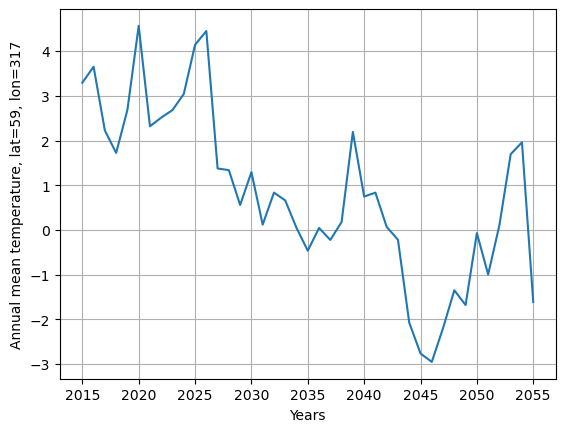

In [27]:
plt.plot(2015+np.arange(41), temp.sel(lat=59, lon=317, method='nearest').groupby('time.year').mean('time')-273.15)
plt.xlabel('Years')
plt.ylabel("Annual mean temperature, lat=59, lon=317")
plt.grid()